In [1]:
# import pandas 
import pandas as pd

In [2]:
#read excel file
df=pd.read_excel("Omnify-Analyst-Intership-Task.xlsx")

In [3]:
# df['Payment']: This part is selecting the 'Payment' column from the DataFrame df
df['Payment ($)']=df['Payment ($)'].str.replace('$','')
df['Payment ($)']=df['Payment ($)'].str.replace(',','')
df['Payment ($)'] = pd.to_numeric(df['Payment ($)'])
df['Payment ($)'].fillna(0, inplace=True)

# The first argument '$' is the substring to be replaced, and the second argument '' is the replacement. In this case, the dollar sign ('$') is replaced with an empty string, effectively

C:\Users\labdh\AppData\Local\Temp\ipykernel_25472\109760342.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Payment ($)']=df['Payment ($)'].str.replace('$','')


In [4]:
# calculating returns
df['Returns %']=((df['Payment ($)'] - df['Cost ($)']) / df['Cost ($)']) * 100

In [5]:
# Extracting the week and month From the week column 
df['Week'] = pd.to_datetime(df['Week'])
df['Week_C'] = df['Week'].dt.week
df['Month'] = df['Week'].dt.month

C:\Users\labdh\AppData\Local\Temp\ipykernel_25472\1114229184.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['Week_C'] = df['Week'].dt.week


In [6]:
import matplotlib.pyplot as plt

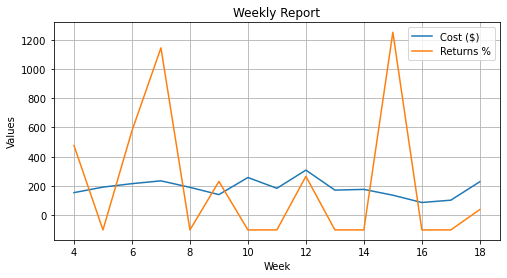

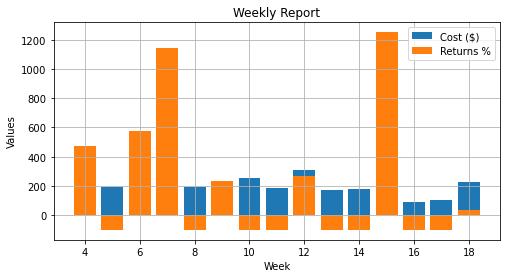

In [7]:

#aggregating and generating weekly reports
weekly_report = df.groupby('Week_C').agg({
    'Cost ($)': 'sum',
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Prospects': 'sum',
    'Payment ($)': 'sum',
    'Returns %': 'mean'
}).reset_index()
#Weekly report as line plot
plt.figure(figsize=(8, 4))
plt.plot(weekly_report['Week_C'], weekly_report['Cost ($)'], label='Cost ($)')
plt.plot(weekly_report['Week_C'], weekly_report['Returns %'], label='Returns %')
plt.xlabel('Week')
plt.ylabel('Values')
plt.title('Weekly Report')
plt.legend()
plt.grid()
plt.show()
#Weekly report as bar plot
plt.figure(figsize=(8, 4))
plt.bar(weekly_report['Week_C'], weekly_report['Cost ($)'], label='Cost ($)')
plt.bar(weekly_report['Week_C'], weekly_report['Returns %'], label='Returns %')
plt.xlabel('Week')
plt.ylabel('Values')
plt.title('Weekly Report')
plt.legend()
plt.grid()
plt.show()

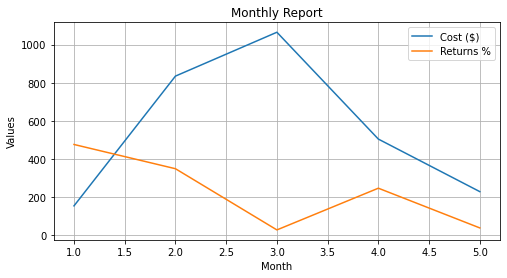

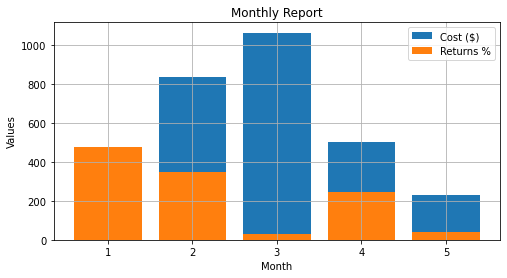

In [9]:
#aggregating and generating monthly reports
Monthly_report = df.groupby('Month').agg({
    'Cost ($)': 'sum',
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Prospects': 'sum',
    'Payment ($)': 'sum',
    'Returns %': 'mean'
}).reset_index()
#Monthly report as line plot
plt.figure(figsize=(8, 4))
plt.plot(Monthly_report['Month'], Monthly_report['Cost ($)'], label='Cost ($)')
plt.plot(Monthly_report['Month'], Monthly_report['Returns %'], label='Returns %')
plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Monthly Report')
plt.legend()
plt.grid()
plt.show()
#Monthly report as bar plot
plt.figure(figsize=(8, 4))
plt.bar(Monthly_report['Month'], Monthly_report['Cost ($)'], label='Cost ($)')
plt.bar(Monthly_report['Month'], Monthly_report['Returns %'], label='Returns %')
plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Monthly Report')
plt.legend()
plt.grid()
plt.show()